<a href="https://colab.research.google.com/github/SarsijNayan/earthengine-community/blob/master/georeferencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install required libraries
!pip install rasterio gdal numpy matplotlib pillow

# Import necessary libraries
import os
import numpy as np
import rasterio
from rasterio.transform import from_gcps
from osgeo import gdal, osr
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the input image path in Google Drive (Update the path)
image_path = "/content/drive/MyDrive/kamlabalan_patt.gif"

# Check if file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Error: File not found at {image_path}")

print("✅ File found!")

# Convert GIF to PNG (if necessary, since GDAL may not support GIF)
png_path = image_path.replace(".gif", ".png")
img = Image.open(image_path)
img.save(png_path, "PNG")

print("✅ Image converted to PNG!")

# Open the converted image using GDAL
dataset = gdal.Open(png_path)
if dataset is None:
    raise RuntimeError("Error: GDAL could not open the image file.")

print("✅ Image successfully loaded into GDAL!")

# Define Ground Control Points (GCPs) - Adjust coordinates as needed
# Format: GCP(longitude, latitude, pixel_x, pixel_y)
gcps = [
    gdal.GCP(85.0, 27.5,  0, 0),  # Top-left
    gdal.GCP(87.0, 27.5,  dataset.RasterXSize, 0),  # Top-right
    gdal.GCP(85.0, 26.0,  0, dataset.RasterYSize),  # Bottom-left
    gdal.GCP(87.0, 26.0,  dataset.RasterXSize, dataset.RasterYSize)  # Bottom-right
]

# Apply the GCPs to the dataset
dataset.SetGCPs(gcps, osr.SRS_WKT_WGS84)

# Define output GeoTIFF file path
output_tiff = "/content/drive/MyDrive/kamlabalan_georef.tif"

# Convert the raster to GeoTIFF
driver = gdal.GetDriverByName("GTiff")
georef_ds = driver.CreateCopy(output_tiff, dataset, strict=0)
georef_ds = None  # Close the dataset

print(f"✅ Georeferenced GeoTIFF saved to: {output_tiff}")

# Visualize the georeferenced image
with rasterio.open(output_tiff) as src:
    plt.imshow(src.read(1), cmap='gray')
    plt.title("Georeferenced Image")
    plt.show()


Mounted at /content/drive
✅ File found!
✅ Image converted to PNG!
✅ Image successfully loaded into GDAL!


AttributeError: module 'osgeo.osr' has no attribute 'SRS_WKT_WGS84'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ File found!
✅ Image converted to PNG!
✅ Image successfully loaded into GDAL!
✅ Georeferenced GeoTIFF saved to: /content/drive/MyDrive/kamlabalan_georef.tif


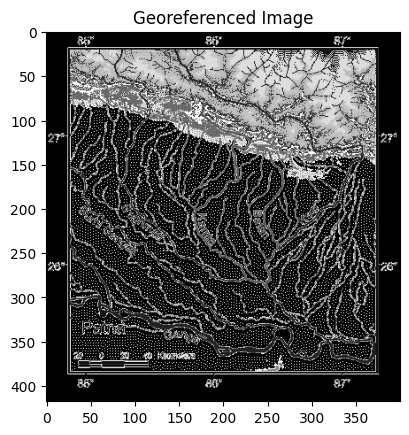

In [4]:
# Install required libraries
!pip install rasterio gdal numpy matplotlib pillow

# Import necessary libraries
import os
import numpy as np
import rasterio
from rasterio.transform import from_gcps
from osgeo import gdal, osr
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the input image path in Google Drive (Update the path)
image_path = "/content/drive/MyDrive/kamlabalan_patt.gif"

# Check if file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Error: File not found at {image_path}")

print("✅ File found!")

# Convert GIF to PNG (if necessary, since GDAL may not support GIF)
png_path = image_path.replace(".gif", ".png")
img = Image.open(image_path)
img.save(png_path, "PNG")

print("✅ Image converted to PNG!")

# Open the converted image using GDAL
dataset = gdal.Open(png_path)
if dataset is None:
    raise RuntimeError("Error: GDAL could not open the image file.")

print("✅ Image successfully loaded into GDAL!")

# Define Ground Control Points (GCPs) - Adjust coordinates as needed
# Format: GCP(longitude, latitude, pixel_x, pixel_y)
gcps = [
    gdal.GCP(85.0, 27.5,  0, 0),  # Top-left
    gdal.GCP(87.0, 27.5,  dataset.RasterXSize, 0),  # Top-right
    gdal.GCP(85.0, 26.0,  0, dataset.RasterYSize),  # Bottom-left
    gdal.GCP(87.0, 26.0,  dataset.RasterXSize, dataset.RasterYSize)  # Bottom-right
]

# Apply the GCPs to the dataset
# Create a spatial reference object
sr = osr.SpatialReference()
sr.ImportFromEPSG(4326) # WGS84
wkt = sr.ExportToWkt() # Get the WKT representation

dataset.SetGCPs(gcps, wkt) # Use the WKT for SetGCPs


# Define output GeoTIFF file path
output_tiff = "/content/drive/MyDrive/kamlabalan_georef.tif"

# Convert the raster to GeoTIFF
driver = gdal.GetDriverByName("GTiff")
georef_ds = driver.CreateCopy(output_tiff, dataset, strict=0)
georef_ds = None  # Close the dataset

print(f"✅ Georeferenced GeoTIFF saved to: {output_tiff}")

# Visualize the georeferenced image
with rasterio.open(output_tiff) as src:
    plt.imshow(src.read(1), cmap='gray')
    plt.title("Georeferenced Image")
    plt.show()